In [296]:
import os

from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd

pd.options.display.max_rows = 999

from sklearn.cluster import bicluster
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
prefix = '/home/tass/database/rutube_test/'

# Идеи

* кажется, что ответы на разные вопросы должны быть скоррелированы, если они честные
  * сделать список уникальных id ответов
  * для каждого пользователя сделать вектор ohe по его ответам
  * попытаться выделить группы пользователей по этим векторам

In [4]:
personal_events = pd.read_csv(os.path.join(prefix, 'personal_events.csv'))

In [5]:
choice_events = personal_events[personal_events.event_type == 'personal_choice']
choice_events.shape

(9605791, 6)

In [6]:
choice_events.head()

,created,event_type,user_id,creative_id,interactive_id,interactive_item_id
1,2019-06-16 21:00:53,personal_choice,6050757,16,109,464
5,2019-06-16 21:02:12,personal_choice,5816185,30,126,525
7,2019-06-16 21:08:05,personal_choice,5994588,31,88,371
11,2019-06-16 21:09:42,personal_choice,5740927,1,99,414
13,2019-06-16 21:10:10,personal_choice,5803096,30,126,525


In [7]:
uniq_users = choice_events.user_id.unique()
uniq_answers = choice_events.interactive_item_id.unique()

user2ind = {user_id: ind for ind, user_id in enumerate(uniq_users)}
answer2ind = {interactive_item_id: ind for ind, interactive_item_id in enumerate(uniq_answers)}

h, w = uniq_users.shape[0], uniq_answers.shape[0]
freq_matrix = np.zeros((h, w))

for event in choice_events.itertuples():
    freq_matrix[user2ind[event.user_id], answer2ind[event.interactive_item_id]] += 1

freq_matrix.sum()

9605791.0

In [8]:
freq_matrix.shape

(303302, 552)

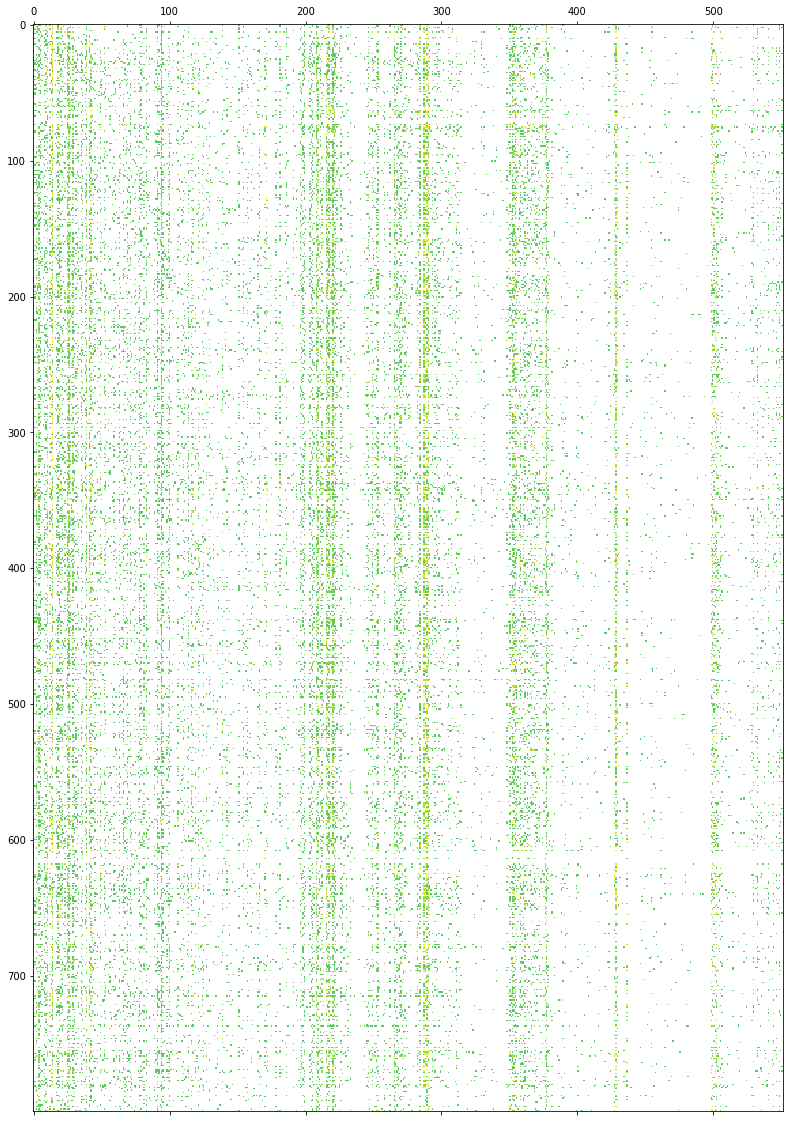

In [300]:
f = plt.figure(figsize=(15, 20))
ax=f.add_subplot(111)
ax.matshow(freq_matrix[:800, :], norm=LogNorm(vmin=0.001, vmax=10))

In [301]:
pca = PCA(n_components=5)

In [302]:
pca_result = pca.fit_transform(freq_matrix)

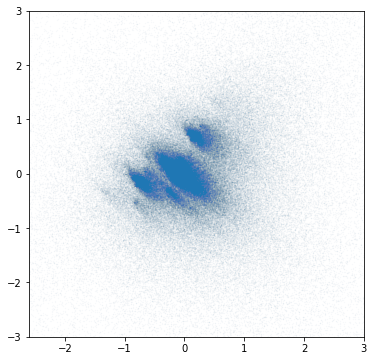

In [310]:
f = plt.figure(figsize=(6, 6))
plt.xlim([-2.6, 3])
plt.ylim([-3, 3.0])
plt.scatter(pca_result[:, 2], pca_result[:, 3], alpha=0.05, s=0.1)
plt.show()
plt.close(f)

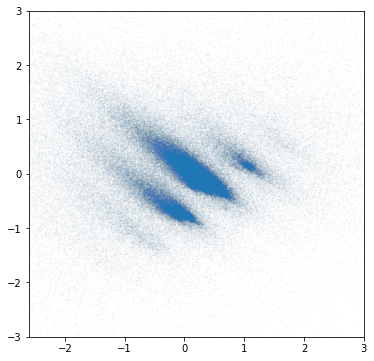

In [311]:
f = plt.figure(figsize=(6, 6))
plt.xlim([-2.6, 3])
plt.ylim([-3, 3.0])
plt.scatter(pca_result[:, 1], pca_result[:, 2], alpha=0.05, s=0.1)
plt.show()
plt.close(f)

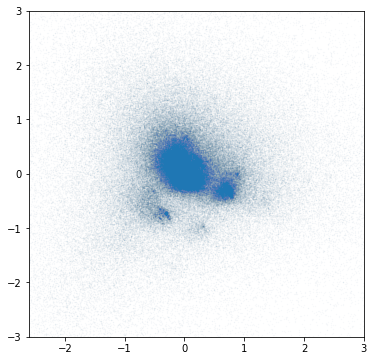

In [313]:
f = plt.figure(figsize=(6, 6))
plt.xlim([-2.6, 3])
plt.ylim([-3, 3.0])
plt.scatter(pca_result[:, 3], pca_result[:, 4], alpha=0.05, s=0.1)
plt.show()
plt.close(f)

# Вывод:

* по PCA можно выполнить кластеризацию пользователей
* скорее всего, центр кластера - честные ответы, "пыль вокруг" - рандомные

In [16]:
freq_matrix_sub = freq_matrix[:20000, :]

In [17]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(freq_matrix_sub)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20000 samples in 1.913s...
[t-SNE] Computed neighbors for 20000 samples in 368.574s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for 

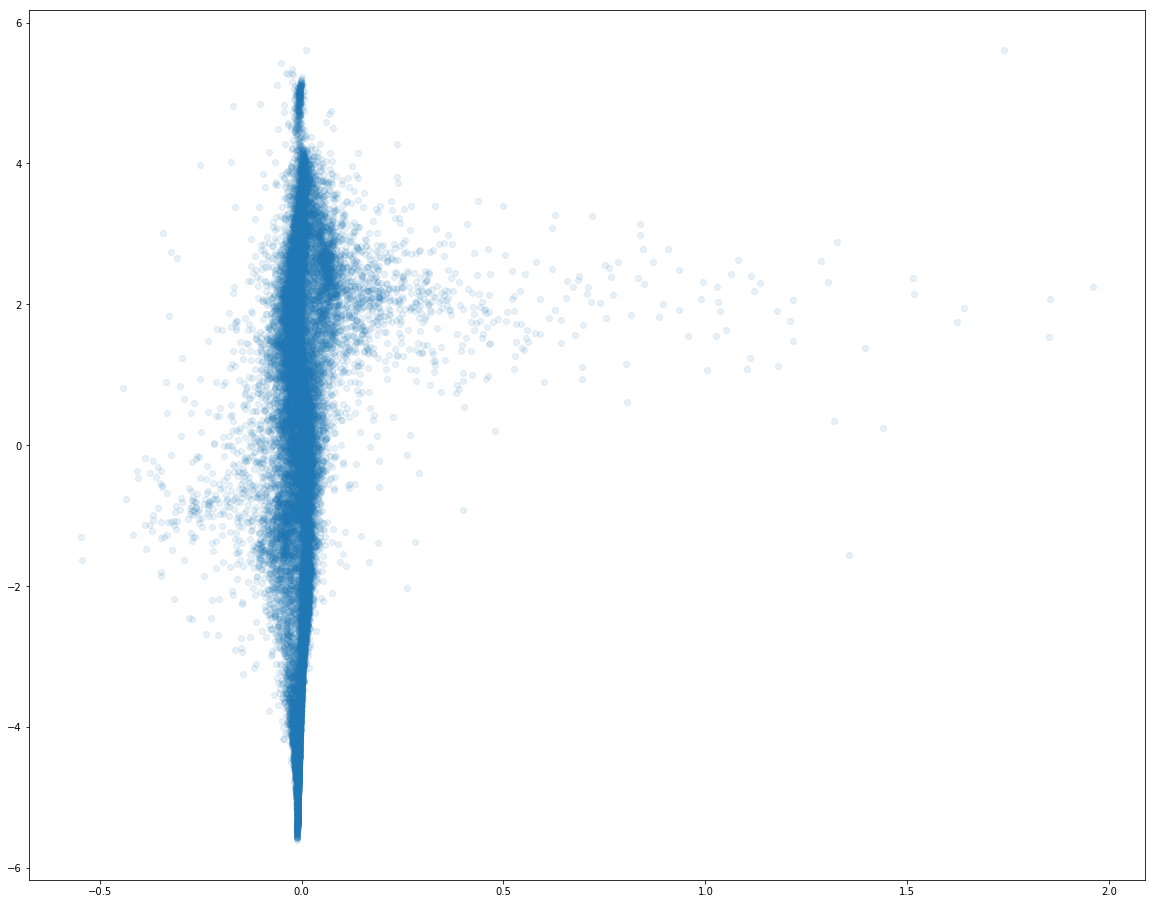

In [18]:
f = plt.figure(figsize=(20, 16))
# plt.xlim([-2.6, 0])
# plt.ylim([-1.5, 2.0])
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.1)
plt.show()
plt.close(f)

### Идеи, на которые наводят эти красивые картинки:

* По векторам частот ответов пользователи кластеризуются
* Гипотеза: в PCA разложении облака около точек (-2.25, 0.5) и (-2, 1) - это пользователи с наиболее скоррелированными ответами, может быть - честными

In [22]:
pca_result

array([[12.7821244 , -1.83120465],
       [ 8.53520412, 10.48010508],
       [ 7.57753552,  9.81765066],
       ...,
       [-2.34691833,  0.41538699],
       [-2.20349548,  0.09718025],
       [-2.48416778,  0.4724586 ]])

In [23]:
users_inds = np.argsort(pca_result[:, 0])

In [24]:
users_inds

array([   738, 284713, 279113, ...,  63042,  10730,  50735])

In [31]:
uniq_users[738]

115

In [85]:
## Чем ближе к концу сортировки по первой PCA компоненте мы берём, тем сильнее разброс в ответах

In [84]:
choice_events[choice_events.user_id == uniq_users[users_inds[-10]]].sort_values(by=['interactive_id', 'interactive_item_id'])

,created,event_type,user_id,creative_id,interactive_id,interactive_item_id
15695802,2019-07-04 17:20:04,personal_choice,6696905,16,7,20
21415214,2019-07-09 23:28:03,personal_choice,6696905,16,7,23
2941241,2019-06-22 23:14:22,personal_choice,6696905,44,28,97
2941300,2019-06-22 23:14:37,personal_choice,6696905,44,28,97
3279427,2019-06-23 10:14:06,personal_choice,6696905,44,28,97
3910575,2019-06-24 04:24:48,personal_choice,6696905,30,28,97
3916088,2019-06-24 04:33:01,personal_choice,6696905,44,28,97
4000609,2019-06-24 06:33:26,personal_choice,6696905,44,28,97
2939429,2019-06-22 23:05:02,personal_choice,6696905,30,28,98
3997593,2019-06-24 06:29:06,personal_choice,6696905,30,28,98


In [52]:
pca_result[users_inds[100000]]

array([-1.7468823 , -0.11921801])

In [53]:
pca_result.shape

(303302, 2)

In [86]:
## Маленькие значения первой PCA компоненты - малый разброс ответов

In [87]:
choice_events[choice_events.user_id == uniq_users[users_inds[10]]].groupby(['interactive_id', 'interactive_item_id'], as_index=False).std().dropna().sort_values(by='creative_id', ascending=False)

,interactive_id,interactive_item_id,user_id,creative_id


## Матрица корреляции по вопросам:

In [89]:
df_corr = pd.DataFrame(freq_matrix)

In [90]:
corr_mat = df_corr.corr().values

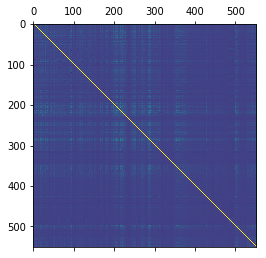

In [91]:
plt.matshow(corr_mat)
plt.show()

In [94]:
corr_mat1 = np.array(corr_mat)

In [95]:
corr_mat1 = corr_mat - np.eye(corr_mat.shape[0])

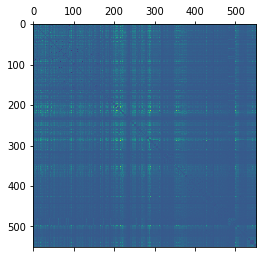

In [96]:
plt.matshow(corr_mat1)
plt.show()

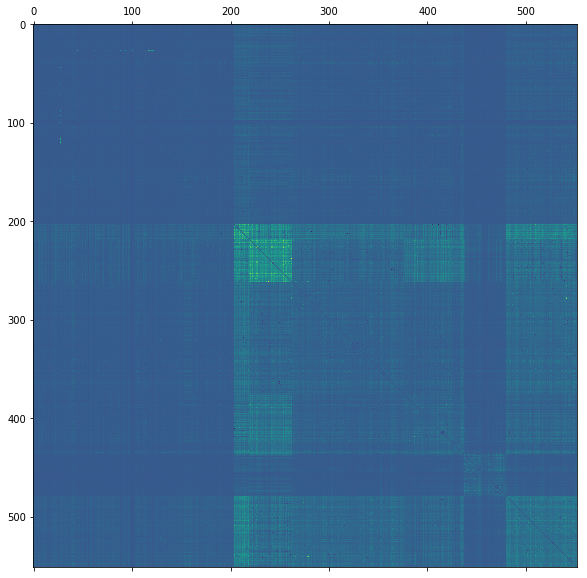

In [198]:
clustering = bicluster.SpectralBiclustering(n_clusters=7, method='log').fit(corr_mat)
reorder_row = np.argsort(clustering.row_labels_)
reorder_column = np.argsort(clustering.column_labels_)
f = plt.figure(figsize=(10, 10))
ax=f.add_subplot(111)
ax.matshow(corr_mat1[:, reorder_row][reorder_row, :])
plt.show()
plt.close(f)

In [199]:
row_color = np.sort(clustering.row_labels_)

In [200]:
coloring = np.array([[p + q for q in row_color] for p in row_color])

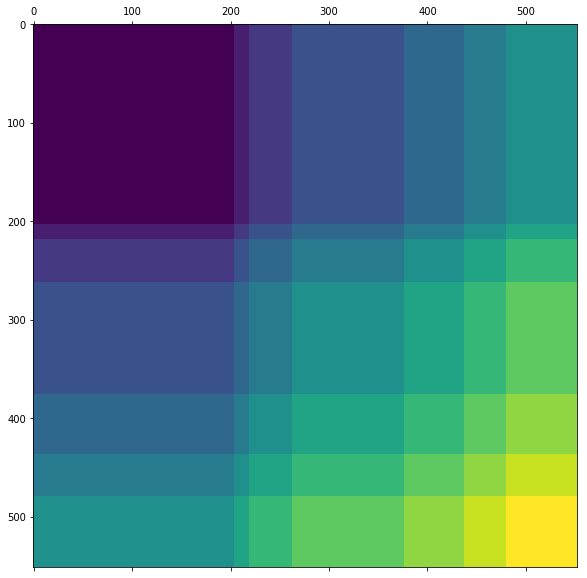

In [201]:
f = plt.figure(figsize=(10, 10))
ax=f.add_subplot(111)
ax.matshow(coloring)
plt.show()
plt.close(f)

## Что означают кластеры

* 0 - всё вперемешку
* 1 - регулярно в отдельной квартире
* 2 - чуваки, которым ничего вообще не нужно
* 3 - "скажи жизни - Да!!!!"
* 4 - может быть иногда
* 5 - дорогой роскошный раз в месяц
* 6 - всегда честно

In [291]:
cluster_id = 1
correlated_ans_inds = np.where(clustering.row_labels_==cluster_id)[0]

In [292]:
correlated_ans_inds.shape

(15,)

In [293]:
correlated_ans_ids = [uniq_answers[t] for t in correlated_ans_inds]

In [294]:
interactive_item = pd.read_csv(os.path.join(prefix, 'interactive_item.tsv'), sep='\t')

In [295]:
interactive_item[interactive_item.id.isin(correlated_ans_ids)]

,id,title,interactive_id
77,96,Регулярно,28
284,343,Музыкальный телеканал,80
477,589,По телевизору,140
485,601,Отдых за городом,142
489,611,Вечером,144
490,612,В выходные,144
492,618,На собственный опыт и вкус,146
510,657,Ольга,155
511,658,СашаТаня,155
513,660,Полицейский с Рублёвки,155


# Что дальше:

* раз выделены кластеры, в которых скоррелированы ответы, то корреляция означает честные ответы
* скор пользователя - наличие ответов из одного кластера